#Loan Prediction Using ML
Project idea – The idea behind this ML project is to build a model that will classify how much loan the user can take. It is based on the user’s marital status, education, number of dependents, and employments. You can build a linear model for this project. 

Dataset: - http://lib.stat.cmu.edu/datasets/boston

In [17]:
### importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

In [18]:
### Loading the dataset into a dataFrame
file_path="/content/housing.csv"
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df=pd.read_csv(file_path,names=column_names,delimiter=r"\s+") 

In [19]:
### Printing first few rows and checking the datatypes
df.head()
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

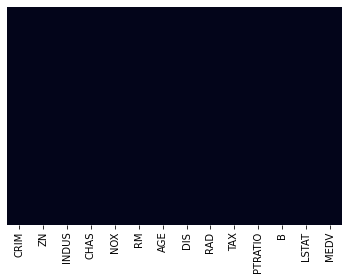

In [20]:
### Running check for NAN values in the dataframe
plt.figure()
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)

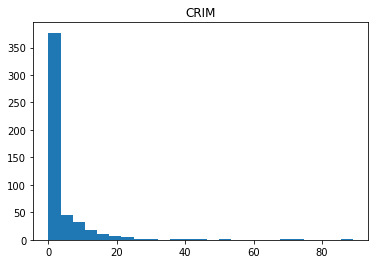

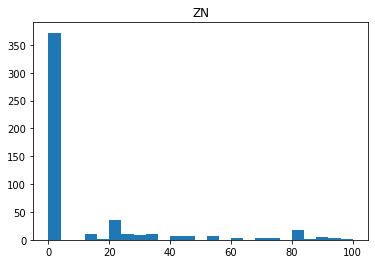

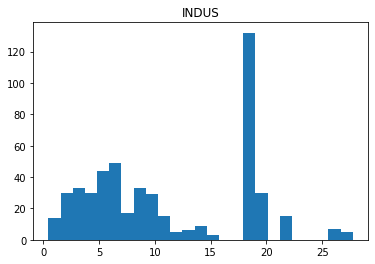

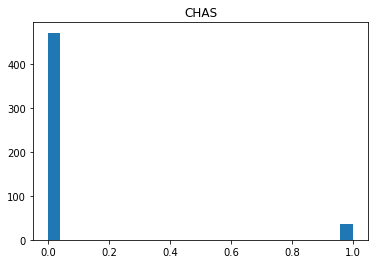

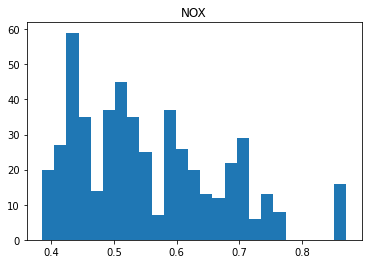

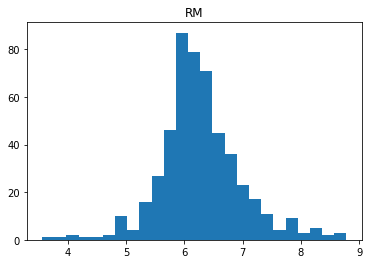

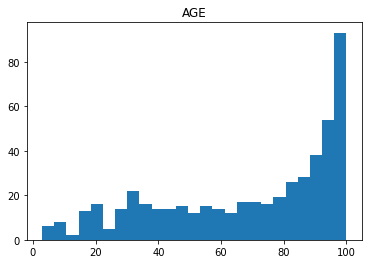

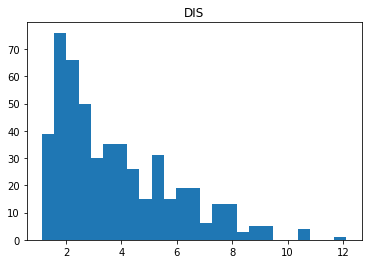

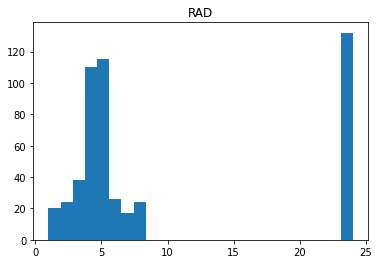

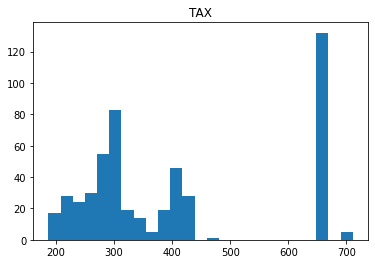

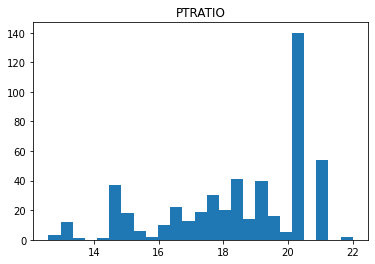

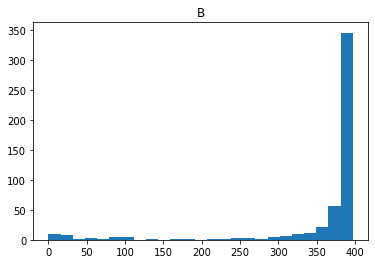

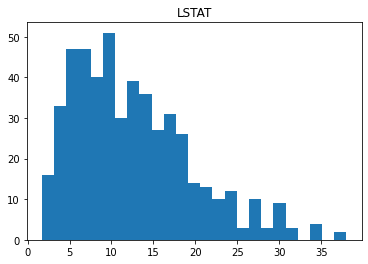

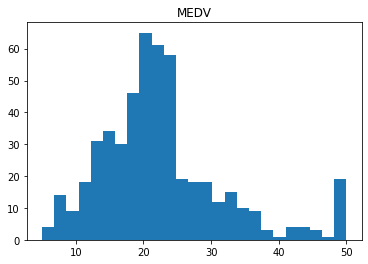

In [21]:
### Plotting distribution for variables
cols=list(df.columns)
for col in cols:
    plt.hist(df[col],bins=25)
    plt.title(col)
    plt.show()

Text(0, 0.5, 'MEDV')

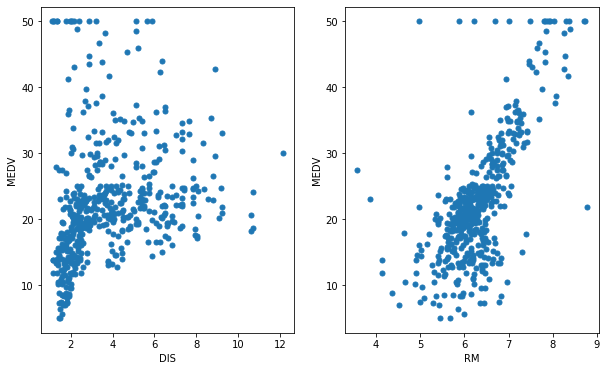

In [22]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.scatter(df['DIS'],df['MEDV'],s=25)
plt.xlabel('DIS')
plt.ylabel('MEDV')
plt.subplot(1,2,2)
plt.scatter(df['RM'],df['MEDV'],s=25)
plt.xlabel('RM')
plt.ylabel('MEDV')

In [23]:
### now check multicolinearity 
def correlation (df,threshold):
    col_corr=set() # names of correlated columns
    corr_matrix=df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    
    return col_corr

print(correlation(df.iloc[:,:-1],0.8))

{'TAX'}


In [24]:
#### removing variables with extreme correlations

final_df=df.drop('TAX',axis=1)
final_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,18.7,396.90,5.33,36.2


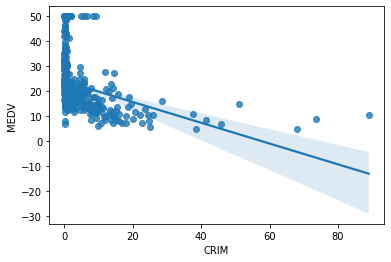

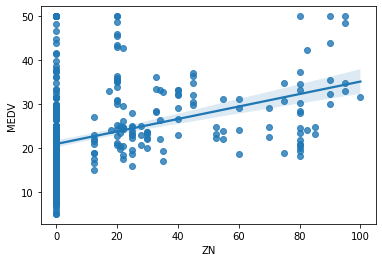

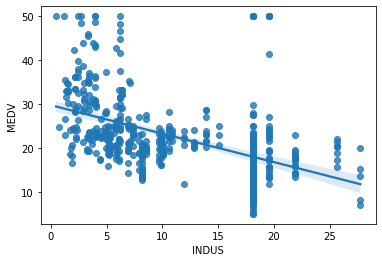

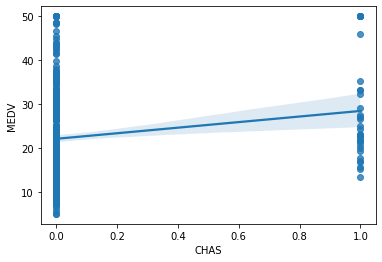

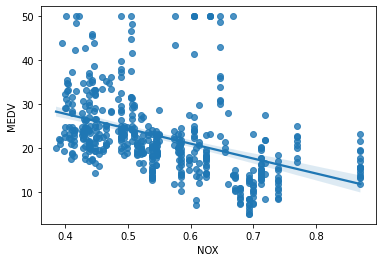

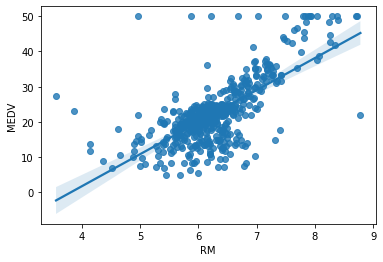

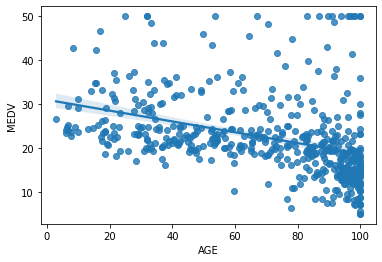

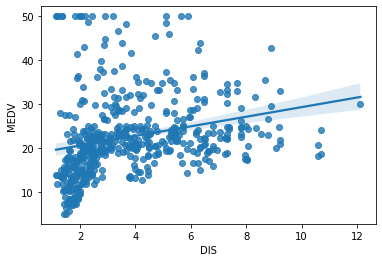

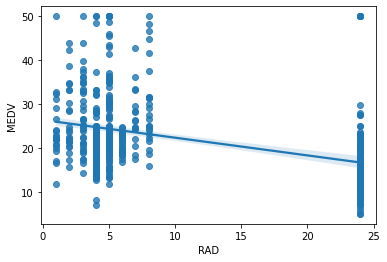

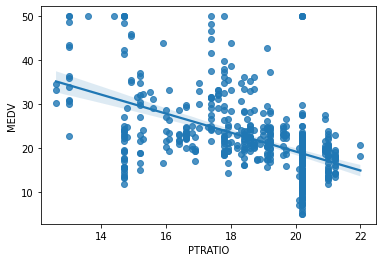

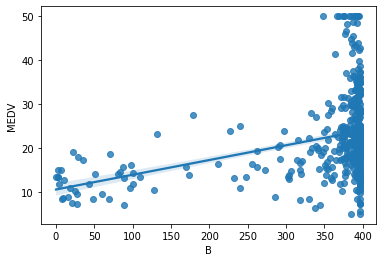

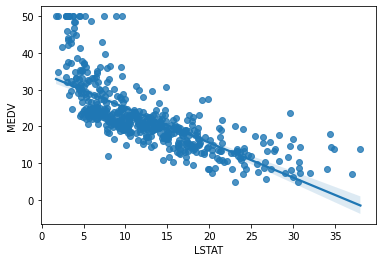

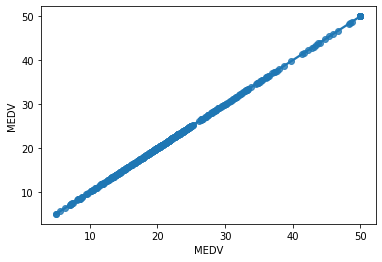

In [25]:
### Plotting relationship between variables
for col in list(final_df.columns):
    sns.regplot(final_df[col],final_df["MEDV"])
    plt.show()

In [26]:
### HERE X is the features and Y is the label.

X=final_df.iloc[:,:-1] 
y=final_df["MEDV"]
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,18.7,396.90,5.33


In [27]:
### Splitting the data into TEST and TRAIN SET
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [28]:
### Scaling Features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [29]:
### Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
model7=GradientBoostingRegressor()
model7.fit(X_train_scaled,y_train)

print("training set score:{:0.2f}".format(model7.score(X_train_scaled,y_train)))
print("test set score:{:0.2f}".format(model7.score(X_test_scaled,y_test)))

training set score:0.98
test set score:0.88
